<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

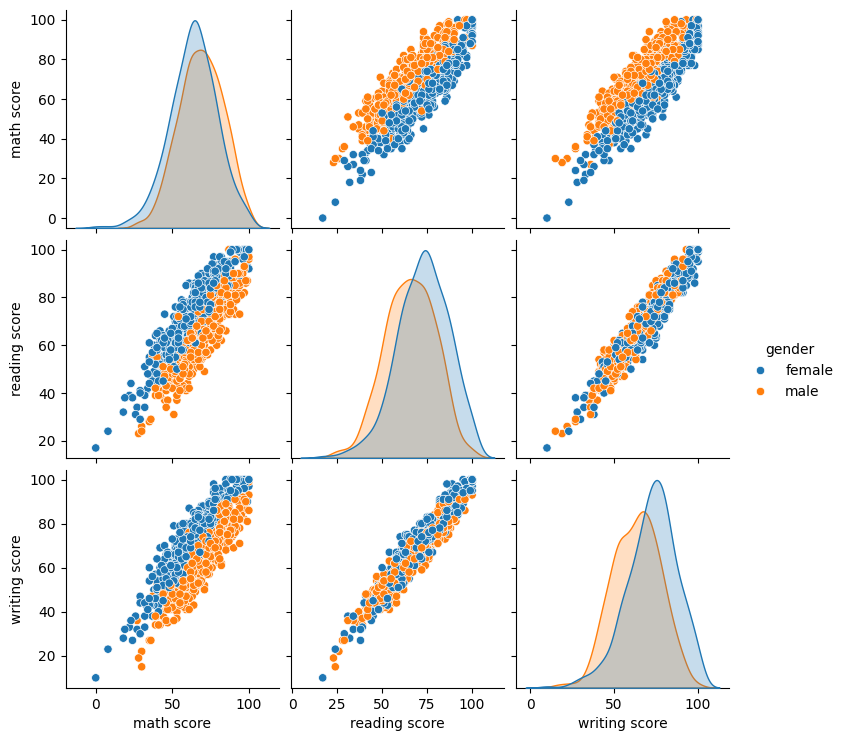

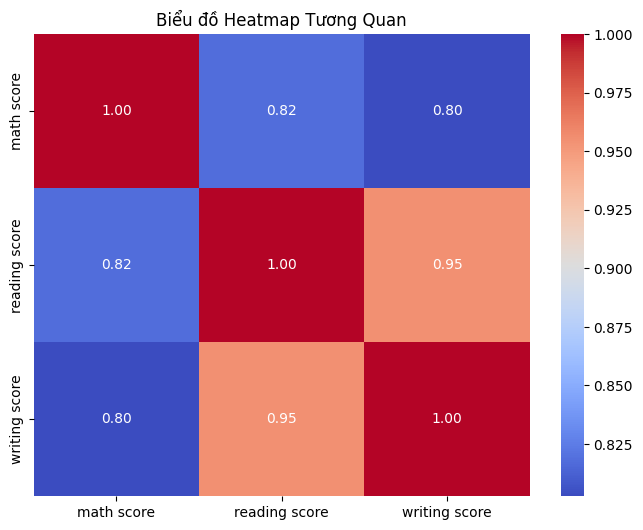

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Tải dữ liệu
df = pd.read_csv('StudentsPerformance.csv')

#câu 1
# Hiển thị thông tin tổng quan về DataFrame
print(df.info())

# Hiển thị thống kê mô tả cho các cột số
print(df.describe())

# Vẽ pairplot để trực quan hóa mối quan hệ giữa các cột số
sns.pairplot(df, hue='gender')  # Thay 'gender' 
plt.show()

# Vẽ heatmap để trực quan hóa ma trận tương quan
các_cột_số = df.select_dtypes(include=['int64']).columns
ma_tran_tuong_quan = df[các_cột_số].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(ma_tran_tuong_quan, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Biểu đồ Heatmap Tương Quan')
plt.show()

In [11]:
#câu2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


df['mean_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['mean_score'].apply(lambda x: 1 if x >= 60 else 0)

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X = df[['math score', 'reading score', 'writing score']]
y = df['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred_logreg = logreg_model.predict(X_test)

# Đánh giá mô hình Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)

print(f'Accuracy (Logistic Regression): {accuracy_logreg}')
print('Classification Report (Logistic Regression):')
print(classification_report_logreg)



# Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy (Random Forest): {accuracy_rf}')
print('Classification Report (Random Forest):')
print(classification_report_rf)


Accuracy (Logistic Regression): 1.0
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       138

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy (Random Forest): 0.985
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.98      0.99       138

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



In [12]:
#câu 3 FFNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.exceptions import ConvergenceWarning
import warnings

# Đọc dữ liệu
df = pd.read_csv('StudentsPerformance.csv')

# Thêm cột 'pass'
df['mean_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['mean_score'].apply(lambda x: 1 if x >= 60 else 0)

# Chuẩn bị dữ liệu
X = df[['math score', 'reading score', 'writing score']]
y = df['pass']

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Thêm cảnh báo hội tụ
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Huấn luyện mô hình FFNN
max_iter = 500  # Có thể thay đổi giá trị này
ffnn_model = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', random_state=42, max_iter=max_iter)
ffnn_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm thử
y_pred_ffnn = ffnn_model.predict(X_test_scaled)

# Đánh giá mô hình FFNN
accuracy_ffnn = accuracy_score(y_test, y_pred_ffnn)
classification_report_ffnn = classification_report(y_test, y_pred_ffnn)

print(f'Accuracy (FFNN): {accuracy_ffnn}')
print('Classification Report (FFNN):')
print(classification_report_ffnn)


Accuracy (FFNN): 1.0
Classification Report (FFNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       138

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [13]:
#câu 3 RNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Đọc dữ liệu
df = pd.read_csv('StudentsPerformance.csv')

# Thêm cột 'pass'
df['mean_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['mean_score'].apply(lambda x: 1 if x >= 60 else 0)

# Chuẩn bị dữ liệu
X = df[['math score', 'reading score', 'writing score']]
y = df['pass']

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming the input has 3 features (math score, reading score, writing score)
input_dim = X_train_scaled.shape[1]

# Xây dựng mô hình RNN
model_rnn = Sequential()
model_rnn.add(LSTM(64, input_shape=(1, input_dim)))
model_rnn.add(Dense(1, activation='sigmoid'))

# Biên dịch mô hình
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Huấn luyện mô hình
model_rnn.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Đánh giá mô hình trên tập kiểm thử
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_reshaped, y_test)
print(f'RNN - Loss: {loss_rnn}, Accuracy: {accuracy_rnn}')

Epoch 1/10
25/25 [==============================] - 3s 28ms/step - loss: 0.6529 - accuracy: 0.8775 - val_loss: 0.6115 - val_accuracy: 0.9300
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5733 - accuracy: 0.9375 - val_loss: 0.5338 - val_accuracy: 0.9250
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4952 - accuracy: 0.9350 - val_loss: 0.4551 - val_accuracy: 0.9250
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.9388 - val_loss: 0.3817 - val_accuracy: 0.9250
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.9438 - val_loss: 0.3188 - val_accuracy: 0.9300
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2965 - accuracy: 0.9500 - val_loss: 0.2678 - val_accuracy: 0.9300
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2521 - accuracy: 0.9550 - val_loss: 0.2279 - val_accuracy: 0.9400
Epoch 8/10
25/25 [=

In [14]:
#câu 4 
# Giảm overfiting của câu 2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('StudentsPerformance.csv')

# Tạo cột mean_score và pass
df['mean_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['mean_score'].apply(lambda x: 1 if x >= 60 else 0)

# Chia dữ liệu thành features (X) và labels (y)
X = df[['math score', 'reading score', 'writing score']]
y = df['pass']

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tiêu chuẩn hóa features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression với regularization và giảm overfitting
logreg_model = LogisticRegression(C=0.01, random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm thử
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Đánh giá mô hình Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)

print(f'Độ chính xác (Logistic Regression): {accuracy_logreg}')
print('Báo cáo phân loại (Logistic Regression):')
print(classification_report_logreg)

# Random Forest với giảm overfitting
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=10, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print(f'Độ chính xác (Random Forest): {accuracy_rf}')
print('Báo cáo phân loại (Random Forest):')
print(classification_report_rf)


Độ chính xác (Logistic Regression): 0.955
Báo cáo phân loại (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        62
           1       0.94      1.00      0.97       138

    accuracy                           0.95       200
   macro avg       0.97      0.93      0.95       200
weighted avg       0.96      0.95      0.95       200

Độ chính xác (Random Forest): 0.975
Báo cáo phân loại (Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        62
           1       0.99      0.97      0.98       138

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



In [15]:
#câu 4 giảm overfiting FFNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.exceptions import ConvergenceWarning
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
import warnings

# Đọc dữ liệu
df = pd.read_csv('StudentsPerformance.csv')

# Thêm cột 'pass'
df['mean_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['mean_score'].apply(lambda x: 1 if x >= 60 else 0)

# Chuẩn bị dữ liệu
X = df[['math score', 'reading score', 'writing score']]
y = df['pass']

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Thêm cảnh báo hội tụ
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Huấn luyện mô hình FFNN với L2 regularization và Dropout sử dụng Keras
max_iter = 100
alpha = 0.001

ffnn_model_keras = Sequential()
ffnn_model_keras.add(Dense(32, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
ffnn_model_keras.add(Dropout(0.3))  # Thêm lớp Dropout với tỷ lệ tắt nơ-ron là 0.3
ffnn_model_keras.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))

# Biên dịch mô hình
ffnn_model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
ffnn_model_keras.fit(X_train_scaled, y_train, epochs=max_iter, batch_size=16, verbose=0)

# Dự đoán trên tập kiểm thử
y_pred_ffnn_keras_prob = ffnn_model_keras.predict(X_test_scaled).reshape(-1)
y_pred_ffnn_keras = (y_pred_ffnn_keras_prob >= 0.5).astype(int)

# Đánh giá mô hình FFNN từ Keras
accuracy_ffnn_keras = accuracy_score(y_test, y_pred_ffnn_keras)
classification_report_ffnn_keras = classification_report(y_test, y_pred_ffnn_keras)

print(f'Accuracy (FFNN - Keras): {accuracy_ffnn_keras}')
print('Classification Report (FFNN - Keras):')
print(classification_report_ffnn_keras)


7/7 [==============================] - 0s 1ms/step
Accuracy (FFNN - Keras): 1.0
Classification Report (FFNN - Keras):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       138

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
#câu 4 overfiting RNN

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers

# Đọc dữ liệu
df = pd.read_csv('StudentsPerformance.csv')

# Thêm cột 'pass'
df['mean_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['mean_score'].apply(lambda x: 1 if x >= 60 else 0)

# Chuẩn bị dữ liệu
X = df[['math score', 'reading score', 'writing score']]
y = df['pass']

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming the input has 3 features (math score, reading score, writing score)
input_dim = X_train_scaled.shape[1]

# Xây dựng mô hình RNN với Dropout và Regularization
model_rnn = Sequential()
model_rnn.add(LSTM(64, input_shape=(1, input_dim), recurrent_dropout=0.2, kernel_regularizer=regularizers.l2(0.01)))
model_rnn.add(Dropout(0.5))  # Thêm lớp Dropout với tỷ lệ tắt nơ-ron là 0.5
model_rnn.add(Dense(1, activation='sigmoid'))

# Biên dịch mô hình
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Huấn luyện mô hình
model_rnn.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Đánh giá mô hình trên tập kiểm thử
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_reshaped, y_test)
print(f'RNN - Loss: {loss_rnn}, Accuracy: {accuracy_rnn}')


In [19]:
#câu 5
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
import warnings

# Đọc dữ liệu
df = pd.read_csv('StudentsPerformance.csv')

# Thêm cột 'pass'
df['mean_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['mean_score'].apply(lambda x: 1 if x >= 60 else 0)

# Chuẩn bị dữ liệu
X = df[['math score', 'reading score', 'writing score']]
y = df['pass']

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Thêm cảnh báo hội tụ
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Huấn luyện mô hình FNN với L2 regularization và Dropout sử dụng Keras
max_iter = 100
alpha = 0.001

ffnn_model_keras = Sequential()
ffnn_model_keras.add(Dense(32, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
ffnn_model_keras.add(Dropout(0.3))  # Thêm lớp Dropout với tỷ lệ tắt nơ-ron là 0.3
ffnn_model_keras.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))

# Biên dịch mô hình
ffnn_model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
ffnn_model_keras.fit(X_train_scaled, y_train, epochs=max_iter, batch_size=16, verbose=0)

# Dự đoán trên tập kiểm thử
y_pred_ffnn_keras_prob = ffnn_model_keras.predict(X_test_scaled).reshape(-1)
y_pred_ffnn_keras = (y_pred_ffnn_keras_prob >= 0.5).astype(int)

# Đánh giá mô hình FFNN từ Keras trước khi cải tiến
accuracy_ffnn_keras = accuracy_score(y_test, y_pred_ffnn_keras)
conf_matrix_before = confusion_matrix(y_test, y_pred_ffnn_keras)

print(f'Accuracy (FFNN - Keras) before improvement: {accuracy_ffnn_keras}')
print('Confusion Matrix (FFNN - Keras) before improvement:')
print(conf_matrix_before)

# Phân tích các trường hợp sai
false_positives = X_test[(y_test == 0) & (y_pred_ffnn_keras == 1)]
false_negatives = X_test[(y_test == 1) & (y_pred_ffnn_keras == 0)]

# Đề xuất biện pháp cải tiến (ví dụ: điều chỉnh ngưỡng quyết định)
threshold = 0.6  # Điều chỉnh ngưỡng từ 0.5 thành 0.6
y_pred_ffnn_keras_thresholded = (y_pred_ffnn_keras_prob >= threshold).astype(int)

# Đánh giá lại mô hình sau khi cải tiến
accuracy_ffnn_keras_thresholded = accuracy_score(y_test, y_pred_ffnn_keras_thresholded)
conf_matrix_after = confusion_matrix(y_test, y_pred_ffnn_keras_thresholded)

print(f'Accuracy (FFNN - Keras) after improvement (thresholded): {accuracy_ffnn_keras_thresholded}')
print('Confusion Matrix (FFNN - Keras) after improvement:')
print(conf_matrix_after)


7/7 [==============================] - 0s 1ms/step
Accuracy (FFNN - Keras) before improvement: 1.0
Confusion Matrix (FFNN - Keras) before improvement:
[[ 62   0]
 [  0 138]]
Accuracy (FFNN - Keras) after improvement (thresholded): 0.99
Confusion Matrix (FFNN - Keras) after improvement:
[[ 62   0]
 [  2 136]]
